In [2]:
from osgeo import gdal
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

In [3]:
np.__version__

'1.21.5'

In [4]:
# For warning removal
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [6]:
# Give system path to file
#The data is from LISS-3 sensor covers a 140-km orbital swath at a spatial resolution of 24 meters with a 24-day repeat cycle
#Spectral Band 1 (µ): 0.52 – 0.59 (green) Spectral Band 2 (µ): 0.62 – 0.68 (red) Spectral Band 3 (µ) : 0.77 – 0.86 (NIR)filepath ='C:\\vaibhav\\IISER\\Courses\\Spatial Data Science\\Classes\\Lecture4\\liss3.tif'
filepath = 'radiometric_error.tif'#'liss3.tif'
file = gdal.Open(filepath)
if file is None:
    print ('There was no such file')
    sys.exit(1)

In [7]:
#read all three band information

Fband = file.GetRasterBand(1)
Fband2 = file.GetRasterBand(2)
Fband3 = file.GetRasterBand(3)

#Read each band data to a 2D array

Fdata = Fband.ReadAsArray()
Fdata2 = Fband2.ReadAsArray()
Fdata3 = Fband3.ReadAsArray()

In [8]:
# Band statistics
# band1
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata.min(), Fdata.max(), Fdata.mean(), Fdata.std()))
# band2
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata2.min(), Fdata2.max(), Fdata2.mean(), Fdata2.std()))
# band3
print ("[ Numpy ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (Fdata3.min(), Fdata3.max(), Fdata3.mean(), Fdata3.std()))


[ Numpy ] =  Minimum=0.000, Maximum=255.000, Mean=64.669, StdDev=16.337
[ Numpy ] =  Minimum=0.000, Maximum=250.000, Mean=37.730, StdDev=14.869
[ Numpy ] =  Minimum=0.000, Maximum=183.000, Mean=69.338, StdDev=20.312


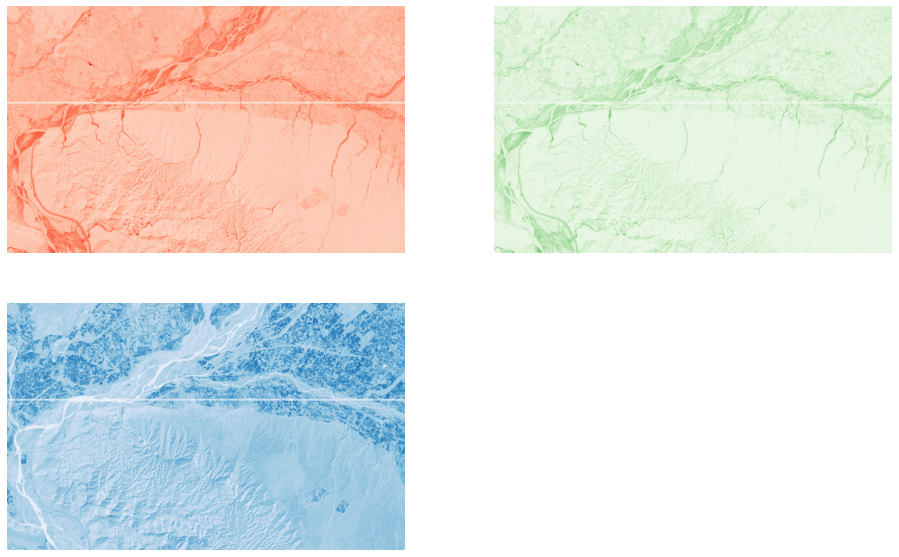

In [9]:
# List of band arrays
List_of_array=[Fdata,Fdata2,Fdata3]
map = ['Reds','Greens','Blues']  # For color gun

# Visialize each band image
fig = plt.figure(figsize = (16,10))
i = 1
for k in List_of_array:
    plt.subplot(220+i)
    plt.axis('off')   
    plt.imshow(k,cmap = map[i-1])
    
    i = i+1
plt.show()

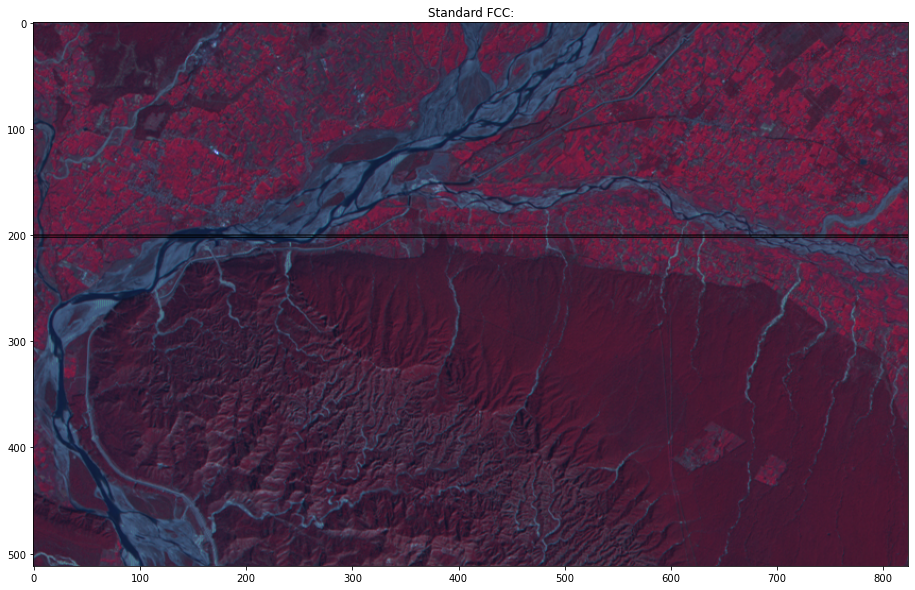

In [10]:
b = Fdata.astype(np.int)
b2 = Fdata2.astype(np.int)
b3 = Fdata3.astype(np.int)

rgb = np.dstack((b3,b2,b))
plt.figure(figsize = (16,10))
plt.axis('on')
plt.imshow(rgb)
plt.title('Standard FCC:')
plt.show()

In [13]:
# Read total bands
Nobands = file.RasterCount
print ('Nobands',Nobands)

# Read spatial parameters
geotransformflow = file.GetGeoTransform()


#geotransformflow[0]  top left x
#geotransformflow[1]  pixel resolution
#geotransformflow[2]
#geotransformflow[3] top left y
#geotransformflow[4]
#geotransformflow[5]  n-s pixel resolution (negative value)

Fproj = file.GetProjection()
ForiginX = geotransformflow[0]
pixelwidth = geotransformflow[1]
ForiginY = geotransformflow[3]
print('pixelwidth',pixelwidth)
print (geotransformflow)
print('Fproj',Fproj)

Nobands 3
pixelwidth 1.0
(0.0, 1.0, 0.0, 1.0, 0.0, -1.0)
Fproj PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]


In [15]:
# Read file dimensions
fclos = file.RasterXSize
frows = file.RasterYSize
print ('fclos',fclos)
print ('frows',frows)
for k in List_of_array:  
    for i in range(2,frows-2):
            for j in range(2,fclos-2):
               
                if k[i][j]==0 or k[i][j]==255:
                   
                    k[i][j]=(k[i-1][j]+k[i][j-1]+k[i+1][j]+ k[i][j+1]+k[i-1][j-1]+k[i-1][j+1]+k[i+1][j+1]+k[i+1][j-1])/8

fclos 824
frows 512


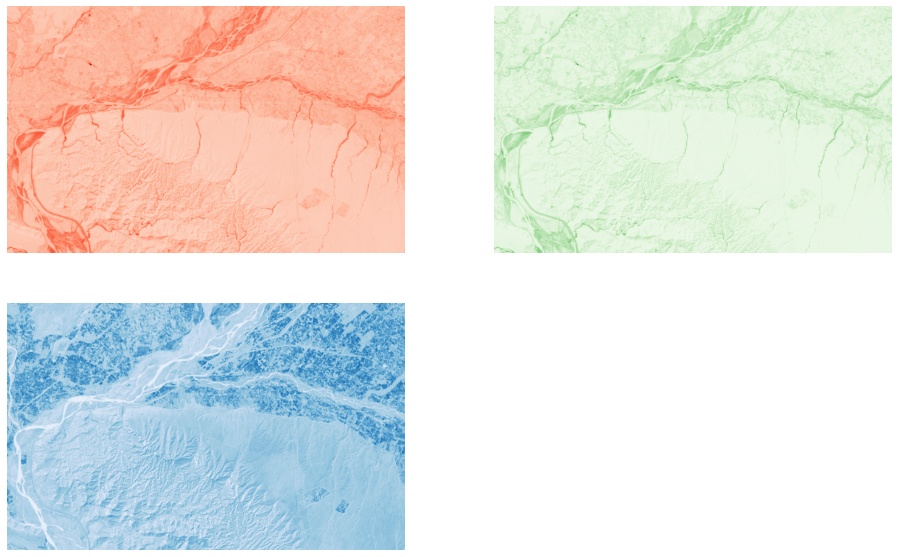

In [19]:
# List of band arrays
# List_of_array=[Fdata,Fdata2,Fdata3]
map = ['Reds','Greens','Blues']  # For color gun

# Visialize each band image
fig = plt.figure(figsize = (16,10))
i = 1
for k in List_of_array:
    plt.subplot(220+i)
    plt.axis('off')   
    plt.imshow(k,cmap = map[i-1])
    
    i = i+1
plt.show()

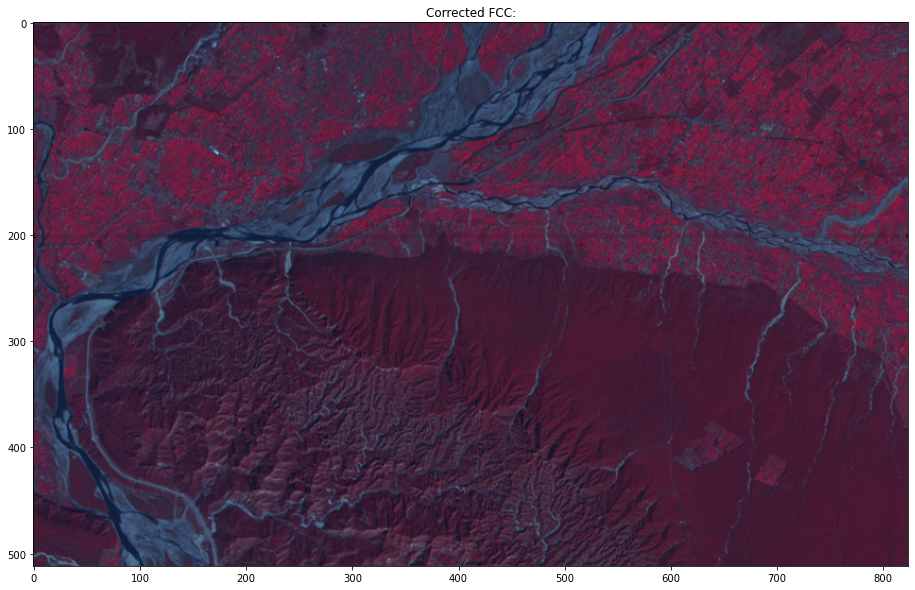

In [29]:
b,b2,b3 = List_of_array[0],List_of_array[1],List_of_array[2]

rgb = np.dstack((b3,b2,b))
plt.figure(figsize = (16,10))
plt.axis('on')
plt.imshow(rgb)
plt.title('Corrected FCC:')
plt.show()

In [27]:
# List of band arrays
List_of_array=[Fdata,Fdata2,Fdata3]
# Read file dimensions
fclos = file.RasterXSize
frows = file.RasterYSize
print ('fclos',fclos)
print ('frows',frows)
for k in List_of_array:  
    for i in range(2,frows-2):
            for j in range(2,fclos-2):
               
                if k[i][j]==0 or k[i][j]==255:
                   
                    k[i][j]=k[i+1][j]

fclos 824
frows 512


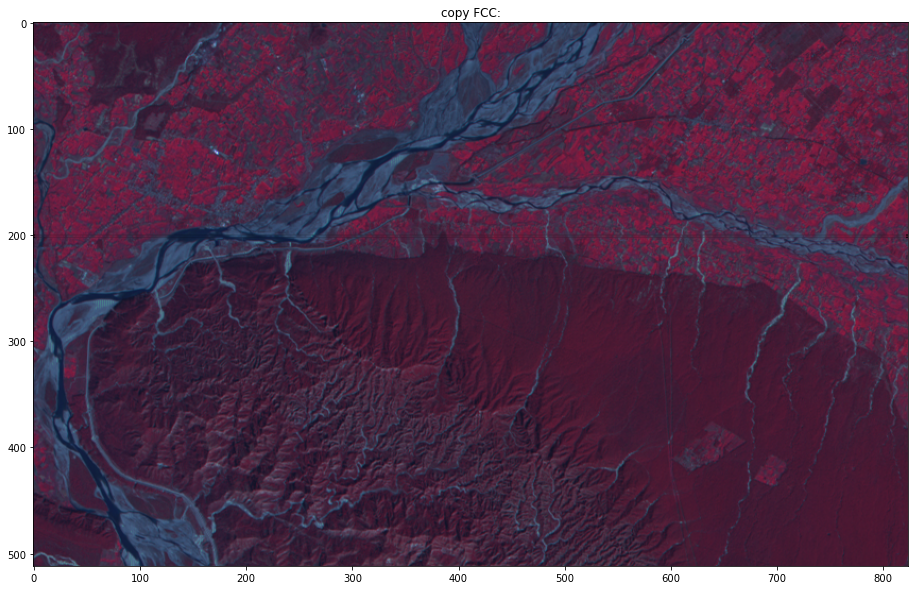

In [30]:
b,b2,b3 = List_of_array[0],List_of_array[1],List_of_array[2]

rgb = np.dstack((b3,b2,b))
plt.figure(figsize = (16,10))
plt.axis('on')
plt.imshow(rgb)
plt.title('copy FCC:')
plt.show()